In [25]:
import numpy as np
import matplotlib.pyplot as plt

In [26]:
data = np.genfromtxt('mpu6050-data.csv', delimiter=',')

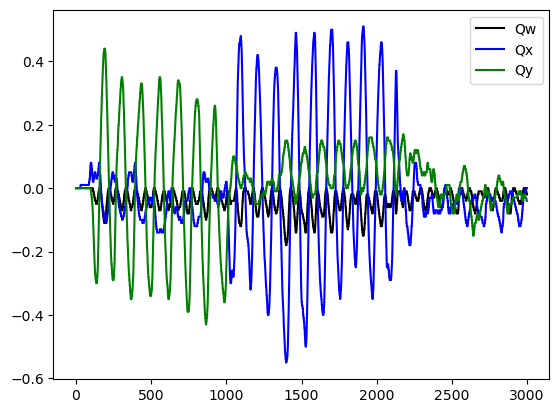

In [27]:
plt.figure()
plt.plot(data[:,0]-1,'-k',label='Qw')
plt.plot(data[:,1],'-b',label='Qx')
plt.plot(data[:,2],'-g',label='Qy')
# plt.plot(data[:,3],'-r',label='Qz')
plt.legend()